In [186]:
import os
from gensim.models import Word2Vec
from unidecode import unidecode
import string
import re
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.manifold import TSNE
import numpy as np
import multiprocessing
import networkx as nx 

import glove

#glove deve ser instalado via git hub, o pip está quebrado
# cmd: pip3 install https://github.com/JonathanRaiman/glove/archive/master.zip
%matplotlib inline

In [131]:
corpus_path = '../data/2019-11-10 13:29:13.766706/filtered_tweets.txt'
graphs_path = '../data/2019-11-10 13:29:13.766706/graphics/'

In [132]:
#importando o corpus
raw_text = ''
with open(corpus_path, 'r') as file:
    raw_text = file.readlines()
    file.close()
    
raw_text = [e.rstrip() for e in raw_text]

print(raw_text)

['toda vez bosolnaro fala impressao deu trago tolete m rda', 'jairbolsonaro presidente bosolnaro rede social facebook gruppo flamengo tundos bloquiando ditadura pt stf possou fala grupo', 'clauber01095735 folha folha poder moro bosolnaro', 'lucasportelaa pq lula ta solto thread vc n entende nada direito politica sabe aconteceu pais', 'bolsominion amigo irmao pedindo socio torcedor emprestado pq quer gastar dinheiro entrada estadiofodase empresto', 'julioal53442452 miltonneves deb mental presidente bosolnaro saber falar sabe tava casa 58 vai dizer bebe cachaca problema bebe', 'lanaramoreira peterjordan100 lanaramoreira kkkkk coitada precisa estudar presidente presidiario esquerda chora manda pagar bolsa manda mail dizendo opressor ah esqueci analfabeto hahahaha', 'mariahbolsonaro iludam esquerdinhas bandido estimacao vcs solto absolvido fiquem empolgados pois pr', 'salsaparrilha4 vem burro', 'leranden neomauriciojr danilo78910 leandroruschel certeza povo importa b chama rua import', 're

In [142]:

word_list = [e.split(' ') for e in raw_text]


#treinando modelo
model_w2v = Word2Vec(
    word_list, 
    window=5, #vizinhos checados
    min_count= multiprocessing.cpu_count(), 
    workers=5,
    size= 200,
    
)
#palavras dentro do modelo
words_in_w2v = list(model_w2v.wv.vocab)[:]


print(model_w2v)
print(words_in_w2v)

Word2Vec(vocab=1310, size=200, alpha=0.025)
['toda', 'vez', 'bosolnaro', 'fala', 'deu', 'm', 'jairbolsonaro', 'presidente', 'rede', 'social', 'facebook', 'flamengo', 'bloquiando', 'ditadura', 'pt', 'stf', 'possou', 'grupo', 'folha', 'poder', 'moro', 'lucasportelaa', 'pq', 'lula', 'ta', 'solto', 'thread', 'vc', 'n', 'entende', 'nada', 'direito', 'politica', 'sabe', 'aconteceu', 'pais', 'bolsominion', 'amigo', 'socio', 'quer', 'dinheiro', 'saber', 'falar', 'tava', 'casa', '58', 'vai', 'dizer', 'bebe', 'problema', 'lanaramoreira', 'kkkkk', 'precisa', 'estudar', 'presidiario', 'esquerda', 'manda', 'dizendo', 'ah', 'bandido', 'estimacao', 'vcs', 'pois', 'pr', 'vem', 'burro', 'leandroruschel', 'certeza', 'povo', 'importa', 'b', 'chama', 'rua', 'movimento', 'negro', 'questao', 'ha', 'tempo', 'massa', 'so', 'quero', 'ver', 'concordo', 'lava', 'jato', 'pode', 'gracas', 'descoberta', 'quadrilha', 'petista', 'dirceu', 'bom', 'dia', 'favor', 'vejam', 'pergunto', 'oficial', 'vendo', 'lideres', 'org

In [134]:
def print_results(model, search_tokens):
    #se for uma palavra
    args = search_tokens.split(' ')

    
    print(search_tokens)
    if len(args) == 1:
        if search_tokens not in words_in_w2v:
            return print('Error - words out of dict')
        for e in model_w2v.wv.most_similar(search_tokens)[:10]:
            print(e)
            print('-'*20)
        print('#'*20)
    
    #se for uma frase
    if len(args) > 1:
        print("Further away from the mean: {0}".format(model.wv.doesnt_match(args)))
        if len(args) == 2:
            print("Similarity: {0}".format(model.wv.similarity(args[0], args[1])))
        print('#'*20)

In [135]:
print_results(model_w2v, 'pec')

pec
('lula', 0.6516968011856079)
--------------------
('brasil', 0.6423418521881104)
--------------------
('so', 0.6123542785644531)
--------------------
('ja', 0.608491063117981)
--------------------
('sao', 0.605750322341919)
--------------------
('ser', 0.6007635593414307)
--------------------
('pt', 0.600189208984375)
--------------------
('prisao', 0.5953267812728882)
--------------------
('stf', 0.585867166519165)
--------------------
('voce', 0.580469012260437)
--------------------
####################


In [136]:
print_results(model_w2v, 'dilma paulo')

dilma paulo
Further away from the mean: paulo
Similarity: 0.14363709092140198
####################


/home/albrigs/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [137]:
#preparando dados para gráfico
search_key = 'presidente'


embeddings, words = [], []

for similar_word, _ in model_w2v.most_similar(search_key):        
    words.append(similar_word)
    embeddings.append(model_w2v[similar_word])
    
        
print(words)

['brasil', 'moro', 'lula', 'so', 'ja', 'prisao', 'ser', 'stf', 'vergonha', 'pt']


/home/albrigs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/home/albrigs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [138]:
embeddings = np.array(embeddings)
print(embeddings.shape)

tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=600, random_state=3)

embeddings_2d = np.array(tsne_model_2d.fit_transform(embeddings))

(10, 200)


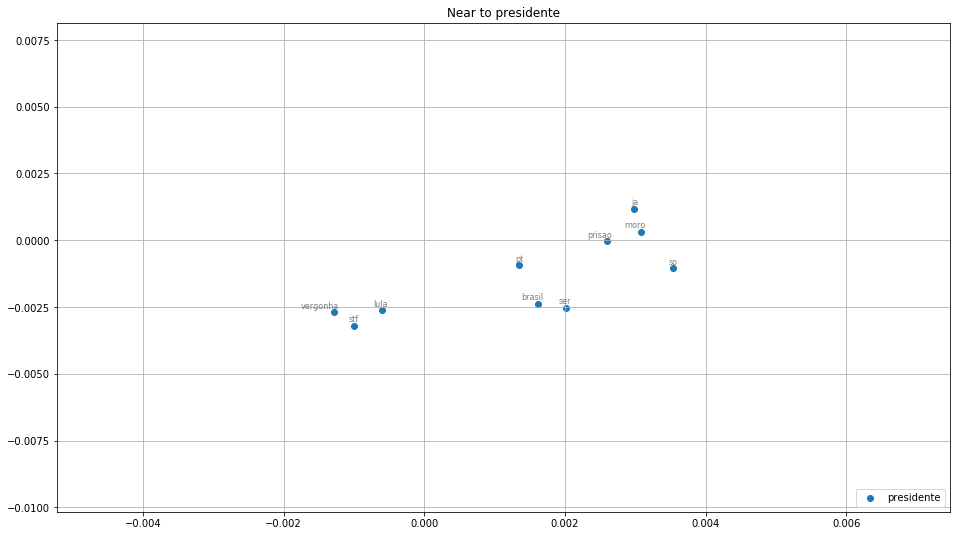

In [139]:

plt.figure(figsize=(16, 9))
x = embeddings[:, 0]
y = embeddings[:, 1]
plt.scatter(x, y, label = search_key)
for i, e in enumerate(words):
    plt.annotate(e, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom', size=8)
plt.legend(loc=4)
plt.title('Near to {0}'.format(search_key))
plt.grid(True)
plt.savefig(graphs_path+'_tnse'+search_key+'.png', format='png', dpi=200)
plt.show()

/home/albrigs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  del sys.path[0]


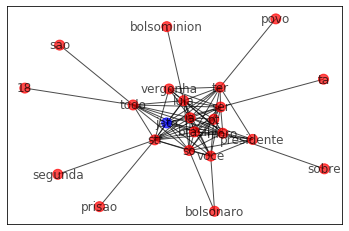

In [183]:
#grafico de rede
net_term = 'jato'
net_graph = nx.Graph()

net_graph.add_node(net_term)

neigbors = model_w2v.wv.most_similar(net_term) #vizinhos

net_graph.add_weighted_edges_from([(net_term, x, y) for x,y in neigbors if y> 0.5] )

#adicionando vizinhos e mostrando relações indiretas
for e in neigbors:
    net_graph.add_weighted_edges_from([(e[0], x, y) for x,y in model_w2v.most_similar(e[0])])

cols = ['r']*len(net_graph.nodes()); cols[list(net_graph.nodes()).index(net_term)]='b'
pos = nx.spring_layout(net_graph, iterations=100)


nx.draw_networkx(
    net_graph,
    pos=pos, #posições
    node_color=cols, #cores
    node_size=100, #tamanho do marcador
    alpha=0.7, 
    font_size=12,
)